# 1-Introduction

We will be looking to predict customer churn for the orange telecom data. The data consists of 5000 observations of customers and  has 20 features with the explanatory varible being whether or not a customer churned.


# 2-Loading Libraries

In [2]:
# Impoting general libraries
import warnings
import itertools
import random

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Class Imbalance
from imblearn.over_sampling import SMOTE


# Machine Learning Model Evaluation Methods
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix


warnings.filterwarnings(action="ignore")
%matplotlib inline


# 3-Loading the Data and Getting to know my data

In [3]:
#Import and visualise data columns
data = pd.read_csv('Orange_Telecom_Churn_Data.csv')
data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [5]:
data.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Insights from Basic Data Analysis:
1. No missing values
2. We  have some features that are categorical data and some are floats
3. Label is a discrete variable (classification problem)
4. We have some extra features which are not relevent for building a machine learning model (need to remove them)

In [6]:
# Remove extraneous columns
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [7]:
# Separating the numerical variables from the categorical variables.
num_var=data.select_dtypes(include=[np.number])
cat_var=data.select_dtypes(include=[object])

In [8]:
# Convert the explanatory variable to a binary from bool
data.churned = data.churned.astype(int)
data.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# 4-EDA

## 4.1 - Univariate KDE for the numerical variables

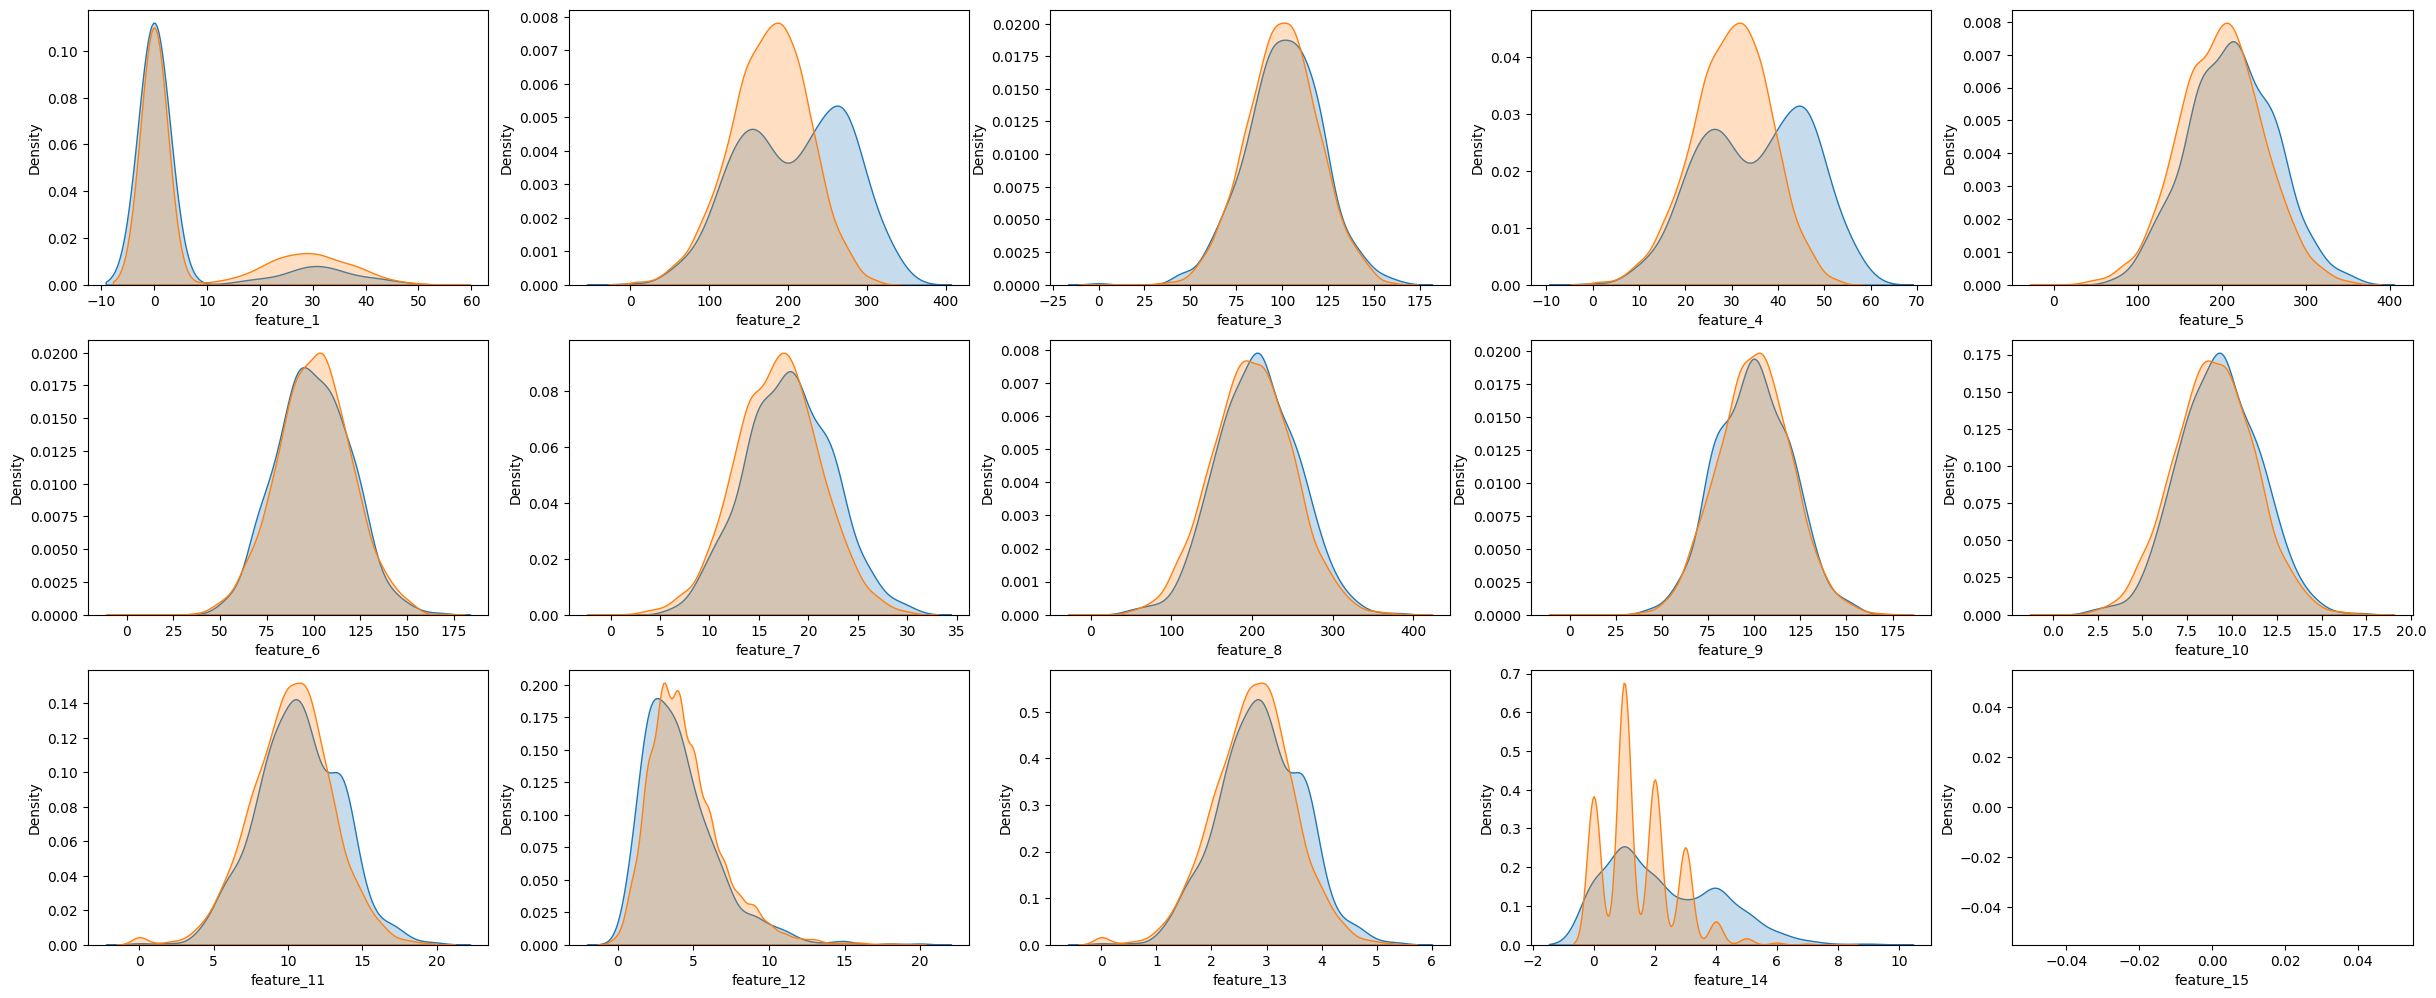

In [9]:
num_var=data.select_dtypes(include=[np.number])

fig = plt.figure(figsize=(30,25))
for i in range(1,len(num_var.columns)):
    ax = fig.add_subplot(6,5, i)
    sns.kdeplot(data[num_var.columns[i]][num_var.churned==True], label='Churned', shade=True)
    sns.kdeplot(data[num_var.columns[i]][num_var.churned==False], label='Did not Churn', shade=True)
    plt.xlabel("feature_" + str(i))


## 4.2 - Bivariate (Scatter Plots)

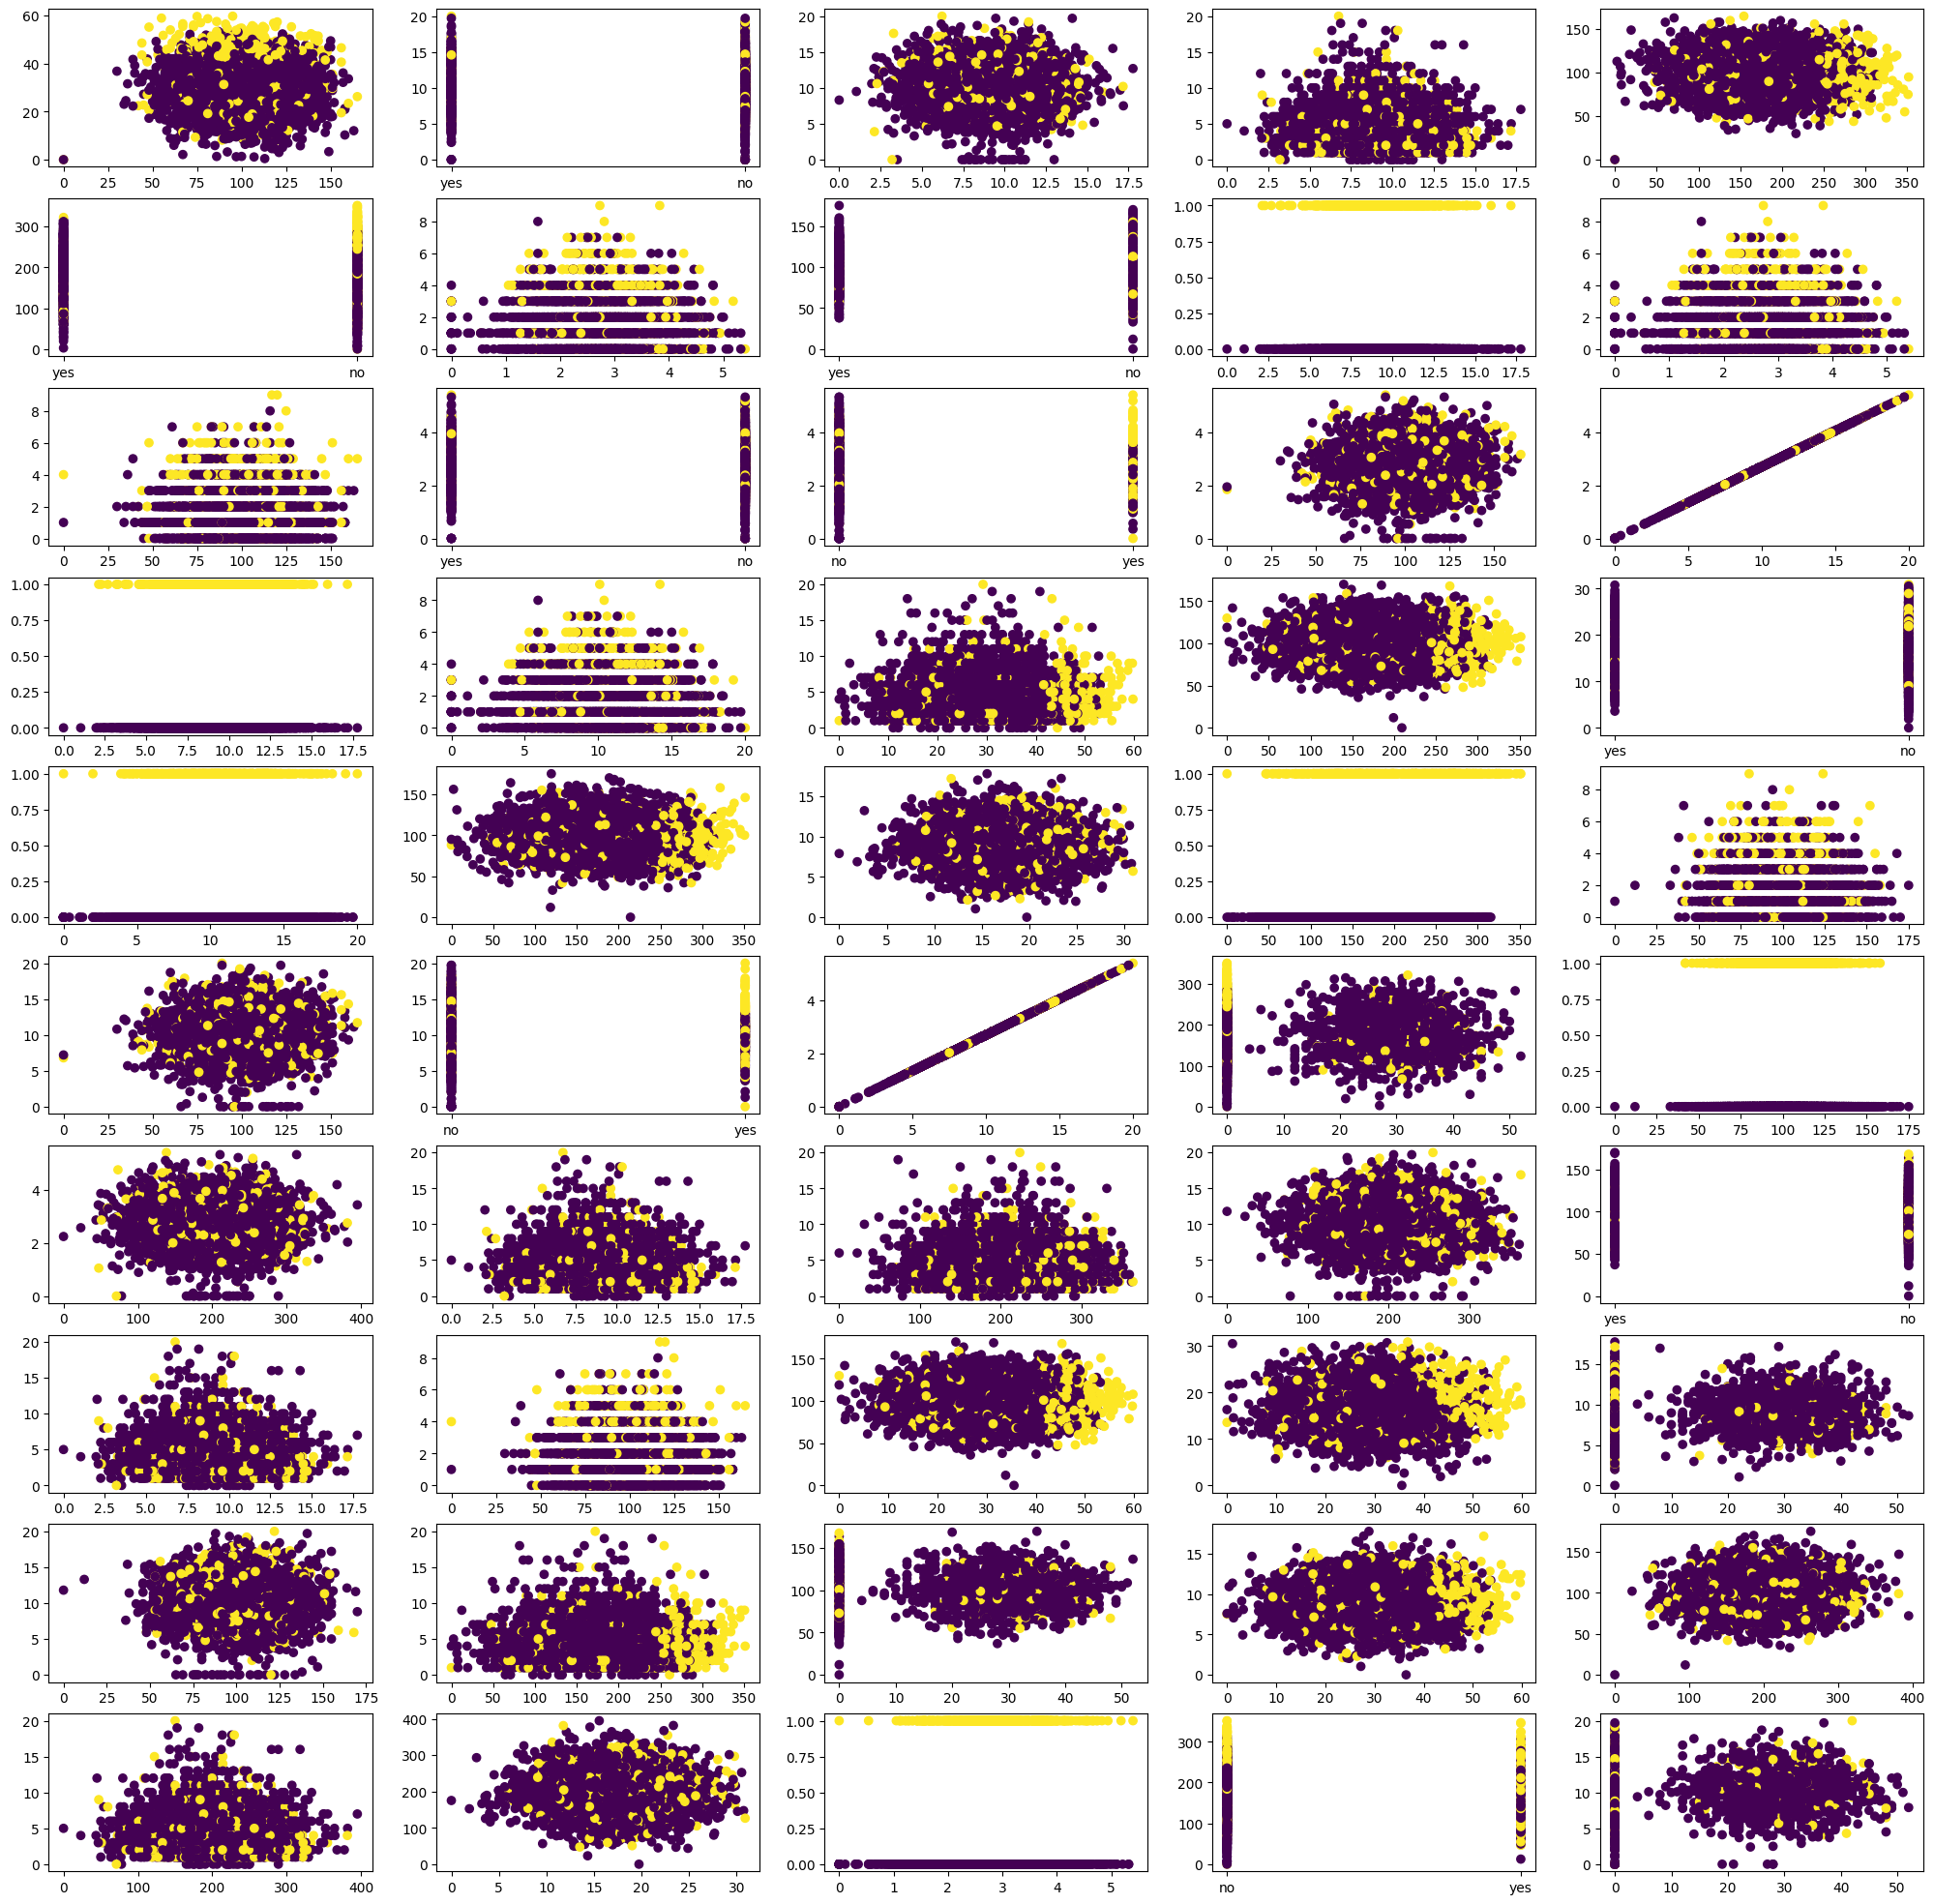

In [10]:
comb = list(itertools.combinations([a for a in range(1, len(data.columns))], 2)) #Create combinations of all features, in twos (bivariate)
rand = random.choices(comb, k=50) #Randomly choose 50 bivariate relationships to visualise. Total bivariate relationships (465 = 30C2) is too much

fig = plt.figure(figsize=(25,25))
for i in range(len(rand)):
    ax = fig.add_subplot(10,5, i+1)
    plt.scatter(data[data.columns[rand[i][0]]],data[data.columns[rand[i][1]]],c=data.churned)


### Insights from EDA:
1. Most data features are not linearly separable for the classification problem as seen from bivariate scatter plots and the univariate KDE plot
2. **Inituition:** Support Vector Machines and Ensemble Methods would probably be the models for this data as they can work non-linear separations

## 4.3 - Class Distribution

Text(0.5, 1.0, 'Ratio of Customers Who churned and Who did Not')

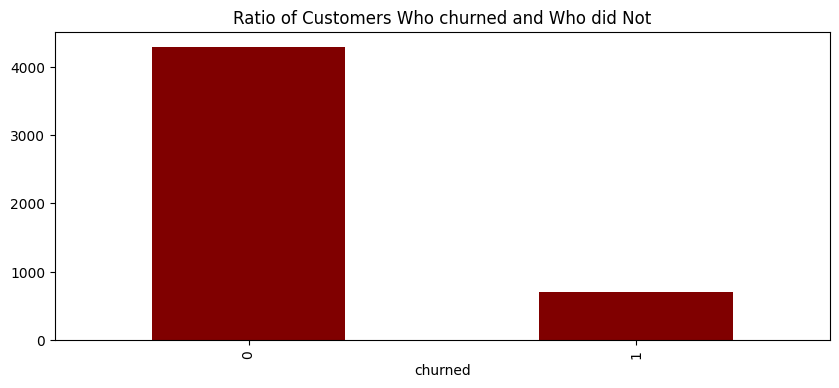

In [11]:
data.churned.value_counts().plot(kind = "bar", figsize = (10,4),color='Maroon')
plt.title("Ratio of Customers Who churned and Who did Not")

## 4.4 - Univariate Analysis - Outliers

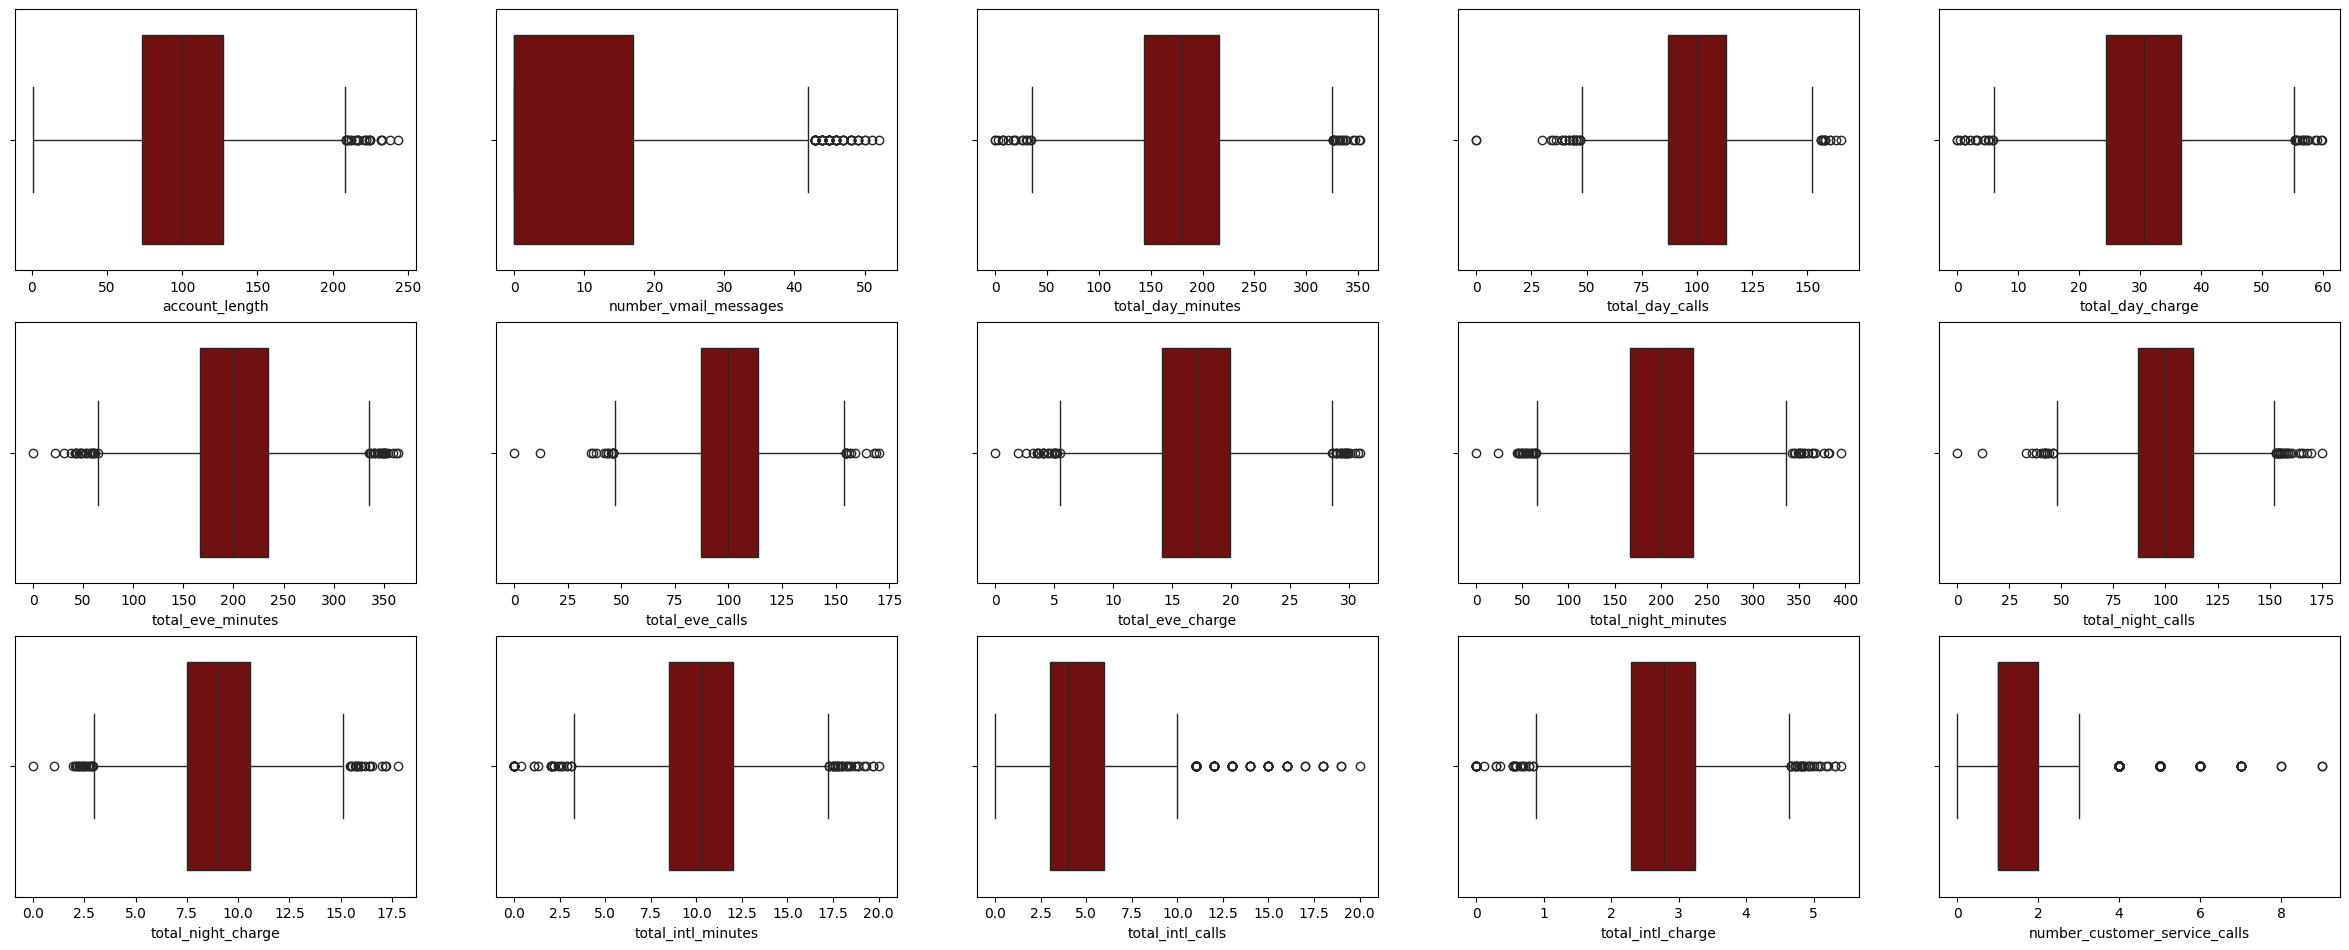

In [12]:
fig = plt.figure(figsize=(30,40))
for i,j in zip(num_var,range(15)):
    ax = fig.add_subplot(10,5, j+1)
    sns.boxplot(data=data,x=data[i],orient='v',color="Maroon")

### Insights from Exploratory Data Analysis:
1. Most of the numerical variables have outliers
2. **Inituition:** We will need a model that is to outliers or may need to treat the outliers, before modelling

# 5-Data Preparation

## 5.1 - Label Encoding

In [13]:
# Encode Categorical Columns
le = LabelEncoder()
cat_var_le = cat_var.apply(le.fit_transform)
df =pd.concat([cat_var_le, num_var], axis=1)
df.head(2)

,intl_plan,voice_mail_plan,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0,1,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,0,1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


## 5.2 - Selecting Feature and Target Matrcies

In [14]:
# Separate the label from the features
X= [x for x in df.columns if x != 'churned']
y = df['churned']

X = df[X]
print(X.shape,y.shape)

(5000, 17) (5000,)


Text(0.5, 1.0, 'DISTIBUTION OF LABEL/Y VARIABLE BALANCED')

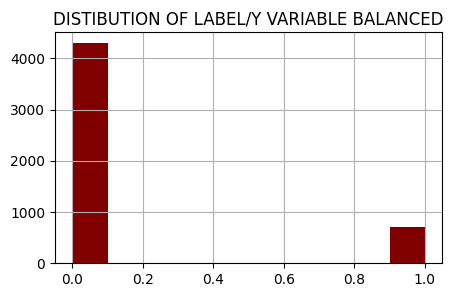

In [15]:
# Smote - Synthetic Minority Oversampling Technique
smote_sample=SMOTE(random_state=124,sampling_strategy='auto')
# X,y=smote_sample.fit_resample(X,y)

plt.figure(figsize=(5,3))
y.hist(color = 'Maroon')
plt.title('DISTIBUTION OF LABEL/Y VARIABLE BALANCED')

# 6-Modelling

In [16]:
# Train Test Split : Reserve 30% of the data for final evaluation/testing
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state= 20)
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(3500, 17) (1500, 17) (3500,) (1500,)


## 6.1 - KNN Classification

In [17]:
# Train a KNN model and Predict
k = 4
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [18]:
yhat=model.predict(X_test)
print("Train set Accuracy: ", accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Train set Accuracy:  0.902
Test set Accuracy:  0.886


In [19]:
# Other values of KNN
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.81866667, 0.88      , 0.86666667, 0.886     , 0.884     ,
       0.88866667, 0.88666667, 0.88466667, 0.88533333, 0.88733333,
       0.89066667, 0.884     , 0.886     , 0.882     ])

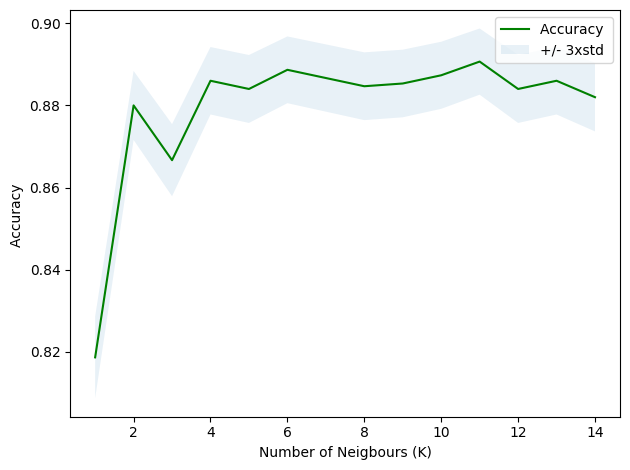

In [20]:
# Visualizing for better interpretability.

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neigbours (K)')
plt.tight_layout()
plt.show()

In [21]:
# Compute it manualy
print('The highest accuracy in the test data is ',mean_acc.max(), 'with a k value of',mean_acc.argmax()+1)

The highest accuracy in the test data is  0.8906666666666667 with a k value of 11


## 6.2 - Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
# Fit our model to the training data
LR = LogisticRegression(C=0.01, solver = 'liblinear').fit(X_train,y_train)

In [24]:
# use this to predict for our test set
yhat = LR.predict(X_test)

In [25]:
# Evaluate our model
print("Train set Accuracy: ", accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Train set Accuracy:  0.8597142857142858
Test set Accuracy:  0.86


In [26]:
# Use logistic regression to return estimates of all classes.
yhat_prob = LR.predict_proba(X_test)
yhat_prob

# First column iss probability in being in the positive class / class 1 P(Y=1|X) and P(Y=0|X)

array([[0.93733377, 0.06266623],
       [0.74516195, 0.25483805],
       [0.91597602, 0.08402398],
       ...,
       [0.62162654, 0.37837346],
       [0.95807255, 0.04192745],
       [0.97337491, 0.02662509]])

In [27]:
# Adjusting the decision boundary
yhat = LR.predict(X_test)
yhat_1 = (LR.predict_proba(X_test)[:,1]>0.3).astype(int)
print(accuracy_score(y_test, yhat),accuracy_score(y_test, yhat_1))


0.86 0.838


## 6.3 - SVM's

In [28]:
# Import the classifier and define the model
from sklearn import svm
clf = svm.SVC(kernel ='rbf')
clf.fit(X_train,y_train)

SVC()

In [29]:
# Use the model to define new classes / test data on which the model has not been trained.
yhat = clf.predict(X_test)

In [30]:
# Evaluate our model
print("Train set Accuracy: ", accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Train set Accuracy:  0.8608571428571429
Test set Accuracy:  0.868


In [31]:
# Use svms for probability
clf = svm.SVC(kernel ='rbf',probability = True)
clf.fit(X_train,y_train)
clf.predict_proba(X_test)

array([[0.97778518, 0.02221482],
       [0.91655697, 0.08344303],
       [0.91746146, 0.08253854],
       ...,
       [0.18859896, 0.81140104],
       [0.91470268, 0.08529732],
       [0.96682335, 0.03317665]])

## 6.4 - Trees and Random Forests

In [36]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [46]:
#define our model and use it train it on the train data
model = DecisionTreeClassifier(random_state=10,criterion='entropy',max_depth = 10)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=10)

In [47]:
# Use the model to define new classes / test data on which the model has not been trained.
yhat = model.predict(X_test)

# Evaluate our model
print("Train set Accuracy: ", accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Train set Accuracy:  0.9851428571428571
Test set Accuracy:  0.94


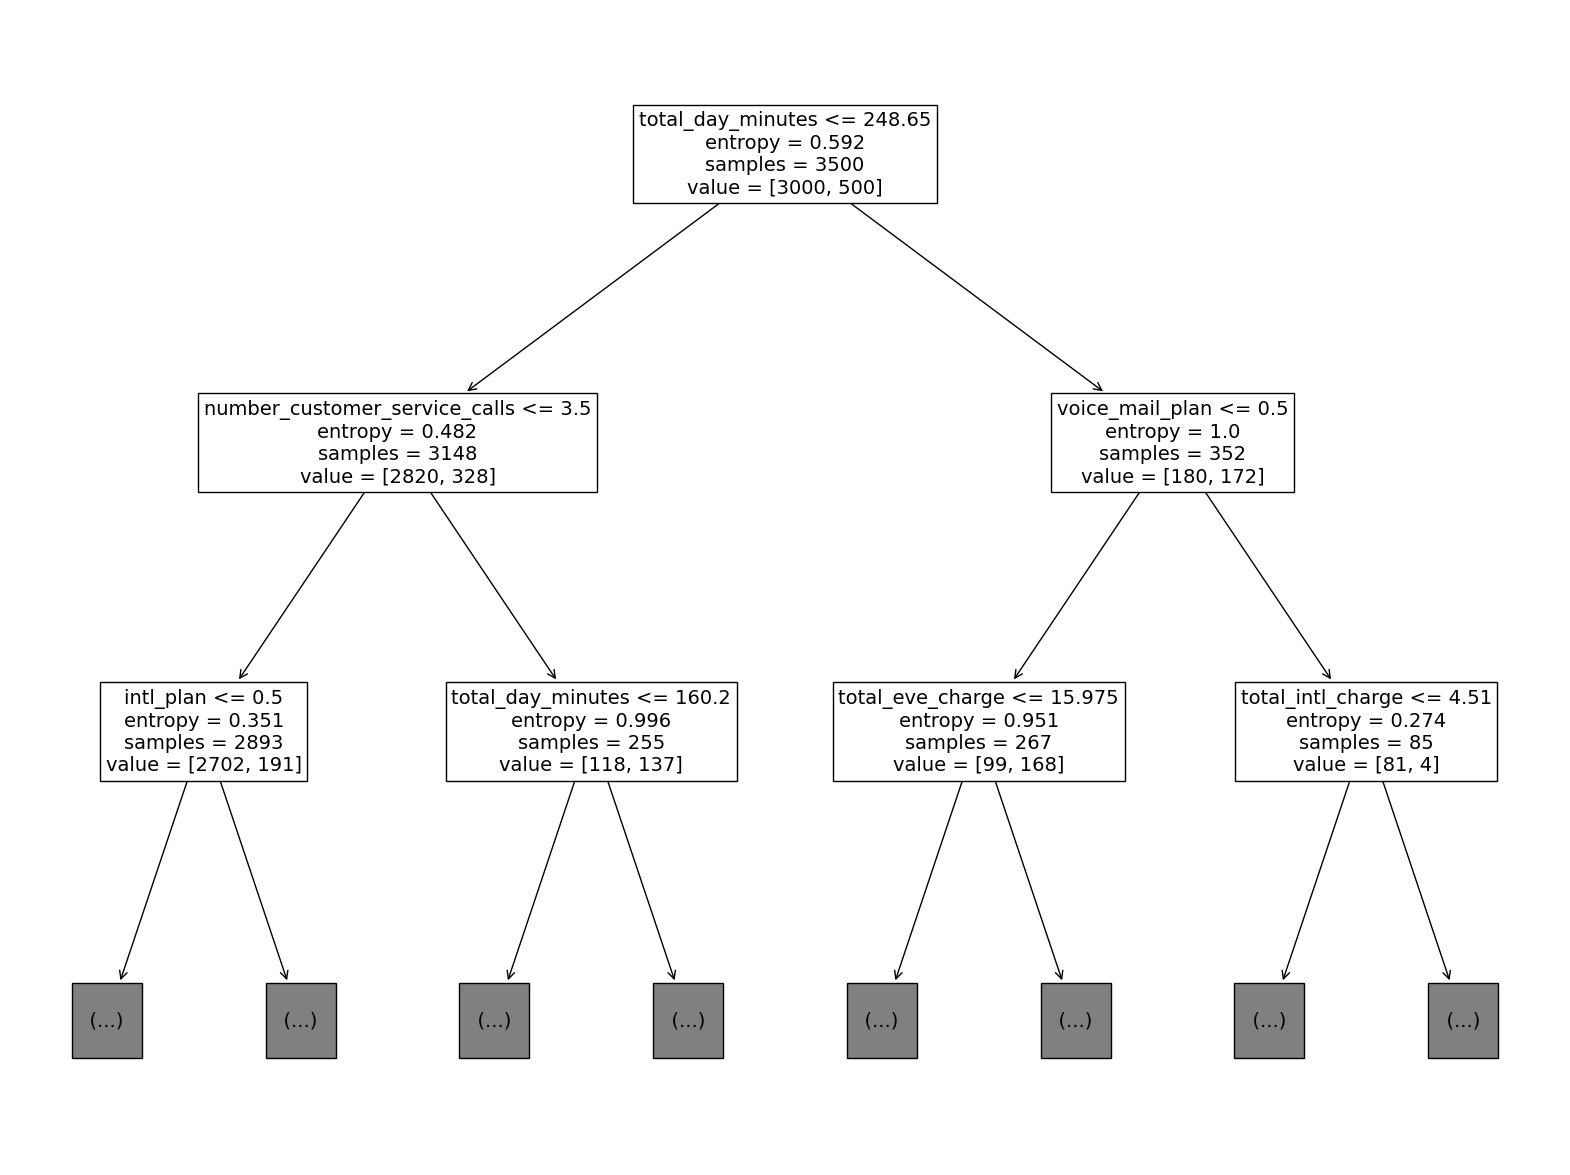

In [50]:
## Plot the decision tree
plt.figure(figsize=(20,15))
plot_tree(model,max_depth=2,fontsize=14,feature_names=X.columns)
plt.show()

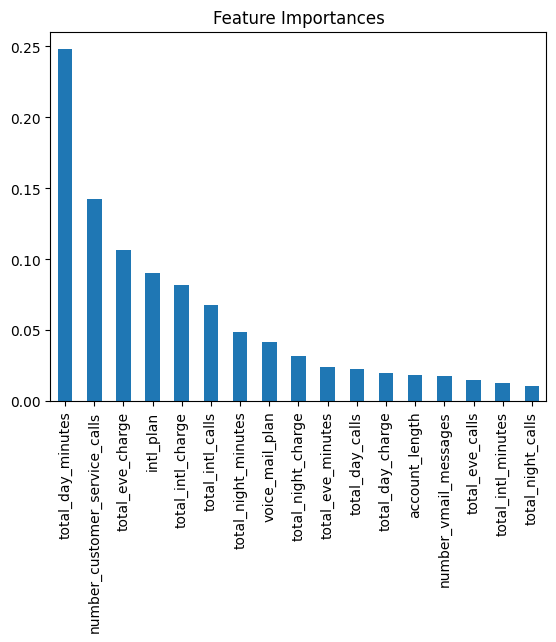

In [52]:
importances = model.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
plt.title('Feature Importances')
plt.show()

In [53]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [59]:
# Train model on train data
model = RandomForestClassifier(n_estimators=100,random_state=10,criterion='gini',max_depth = 10)
model.fit(X_train,y_train)


RandomForestClassifier(max_depth=10, random_state=10)

In [60]:
# Use the model to define new classes / test data on which the model has not been trained.
yhat = model.predict(X_test)

# Evaluate our model
print("Train set Accuracy: ", accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Train set Accuracy:  0.9808571428571429
Test set Accuracy:  0.9553333333333334


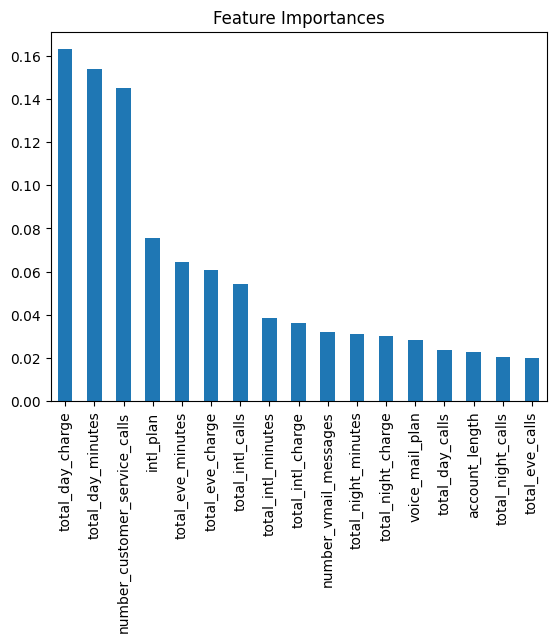

In [61]:
importances = model.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
plt.title('Feature Importances')
plt.show()

## 6.5 - Boosted Models - XG Boost

In [72]:
import xgboost

In [73]:
xgboost.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [78]:
model_xgboost= xgboost.XGBClassifier(
                                    learning_rate = 0.1,
                                    max_depth = 5,
                                    n_estimators = 1000,
                                    subsample = .5,
                                    colsample_bytree = .5,
                                    eval_metric = 'auc',
                                    verbosity = 0)

eval_set = [(X_test, y_test)]

model_xgboost.fit(X_train,
                  y_train,
                  early_stopping_rounds=15,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.80268
[1]	validation_0-auc:0.79778
[2]	validation_0-auc:0.87515
[3]	validation_0-auc:0.90501
[4]	validation_0-auc:0.90962
[5]	validation_0-auc:0.91212
[6]	validation_0-auc:0.91786
[7]	validation_0-auc:0.91830
[8]	validation_0-auc:0.91875
[9]	validation_0-auc:0.92015
[10]	validation_0-auc:0.92071
[11]	validation_0-auc:0.91851
[12]	validation_0-auc:0.92006
[13]	validation_0-auc:0.92036
[14]	validation_0-auc:0.92512
[15]	validation_0-auc:0.92359
[16]	validation_0-auc:0.92211
[17]	validation_0-auc:0.92178
[18]	validation_0-auc:0.92329
[19]	validation_0-auc:0.92315
[20]	validation_0-auc:0.92352
[21]	validation_0-auc:0.92337
[22]	validation_0-auc:0.92476
[23]	validation_0-auc:0.92607
[24]	validation_0-auc:0.92623
[25]	validation_0-auc:0.92837
[26]	validation_0-auc:0.92836
[27]	validation_0-auc:0.92994
[28]	validation_0-auc:0.93085
[29]	validation_0-auc:0.93236
[30]	validation_0-auc:0.93313
[31]	validation_0-auc:0.93261
[32]	validation_0-auc:0.93255
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [79]:
# use our model to predict new cases
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
y_hat = model_xgboost.predict_proba(X_test)[:,1]

In [80]:
# Evaluate our model
print("Train set Accuracy: ", roc_auc_score(y_train,y_train_pred))
print("Test set Accuracy: ", roc_auc_score(y_test, yhat))

Train set Accuracy:  0.9802786666666667
Test set Accuracy:  0.862509387224408
